<a href="https://colab.research.google.com/github/Sophia124990/Tareas_CienciaDatos/blob/main/Tarea_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#autor: Karla Sophia López González
#idautor: 225594-2
#profesor: Lázaro Bustio Martínez

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [ ]:

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tarea 19/train-data.csv')

test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tarea 19/test-data.csv')

print(train_data.head())

print(test_data.head())


   Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN

In [ ]:
# Identificar valores faltantes en el conjunto de entrenamiento
print(train_data.isnull().sum())

# Identificar valores faltantes en el conjunto de prueba
print(test_data.isnull().sum())


Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


In [ ]:

print(train_data.dtypes)


print(test_data.dtypes)


Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object
Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object


In [ ]:
# Función para convertir valores de cadena a float
def convert_to_float(value):
    if pd.isnull(value):
        return np.nan
    try:
        # Extraer el número del string y convertirlo a float
        return float(value.split()[0])
    except (ValueError, AttributeError):
        return np.nan

train_data['Mileage'] = train_data['Mileage'].apply(convert_to_float)
test_data['Mileage'] = test_data['Mileage'].apply(convert_to_float)


for column in ['Mileage']:
    train_data[column].fillna(train_data[column].median(), inplace=True)
    test_data[column].fillna(test_data[column].median(), inplace=True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:

print(train_data.describe())


        Unnamed: 0         Year  Kilometers_Driven      Mileage        Seats  \
count  6019.000000  6019.000000       6.019000e+03  6019.000000  5977.000000   
mean   3009.000000  2013.358199       5.873838e+04    18.134966     5.278735   
std    1737.679967     3.269742       9.126884e+04     4.581528     0.808840   
min       0.000000  1998.000000       1.710000e+02     0.000000     0.000000   
25%    1504.500000  2011.000000       3.400000e+04    15.170000     5.000000   
50%    3009.000000  2014.000000       5.300000e+04    18.150000     5.000000   
75%    4513.500000  2016.000000       7.300000e+04    21.100000     5.000000   
max    6018.000000  2019.000000       6.500000e+06    33.540000    10.000000   

             Price  
count  6019.000000  
mean      9.479468  
std      11.187917  
min       0.440000  
25%       3.500000  
50%       5.640000  
75%       9.950000  
max     160.000000  


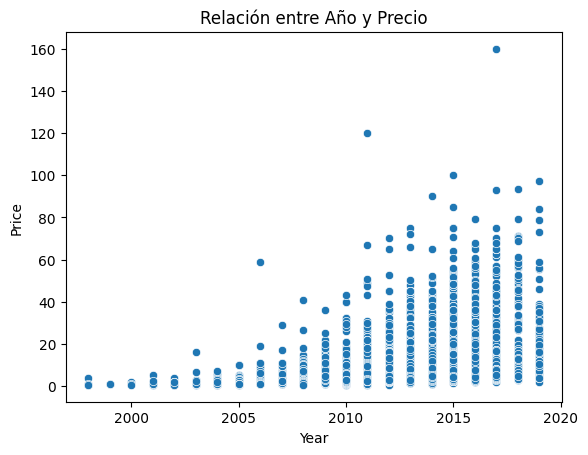

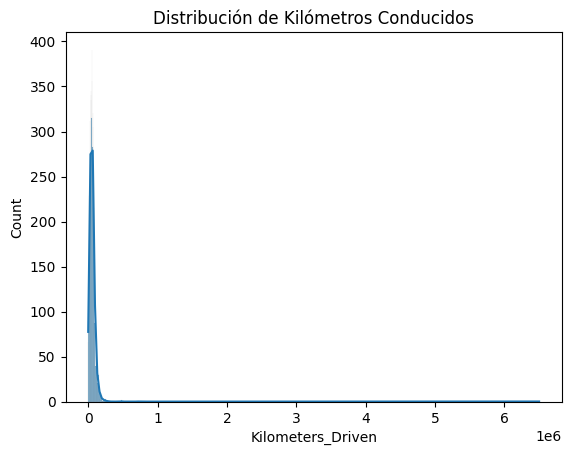

In [ ]:
# Relación entre el año del vehículo y el precio
sns.scatterplot(x='Year', y='Price', data=train_data)
plt.title('Relación entre Año y Precio')
plt.show()

# Distribución del Kilometraje
sns.histplot(train_data['Kilometers_Driven'], kde=True)
plt.title('Distribución de Kilómetros Conducidos')
plt.show()


<ipython-input-11-8f1013f9c09e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


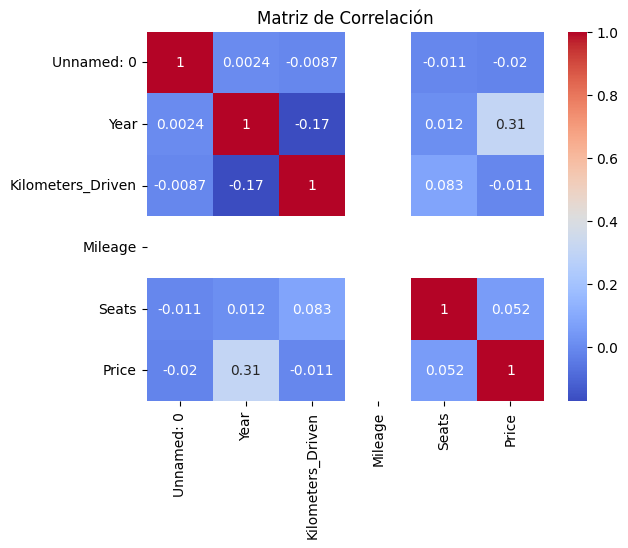

In [ ]:
# Correlación entre variables
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [ ]:

features = train_data.drop(columns=['Name', 'New_Price', 'Price'])
labels = train_data['Price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
# Identificando columnas numéricas y categóricas
numeric_columns = features.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = features.select_dtypes(include=['object']).columns

#preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [ ]:
linear_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Entrenamiento del pipeline con el conjunto de entrenamiento
linear_model_pipeline.fit(X_train, y_train)

# Predicción y evaluación usando el conjunto de prueba
y_pred = linear_model_pipeline.predict(X_test)
print("RMSE en Test Set:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE en Test Set: 5.575987305145597


In [ ]:
# Creando el pipeline para Random Forest
rf_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

# Entrenamiento del modelo de Random Forest
rf_model_pipeline.fit(X_train, y_train)

# Evaluación del modelo de Random Forest
y_pred_rf = rf_model_pipeline.predict(X_test)
print("RMSE Random Forest:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


RMSE Random Forest: 4.574845931745786


In [ ]:
'''Conclusión:

Análisis Exploratorio de Datos:

Exploré los datos de entrenamiento y prueba para comprender su distribución y características.
Identifiqué valores faltantes y los imputé con métodos apropiados.
Visualicé la relación entre variables y distribuciones para extraer información relevante.
Preprocesamiento de Datos:

Utilicé un ColumnTransformer para aplicar transformaciones específicas a columnas numéricas y categóricas.
Normalicé los datos numéricos con StandardScaler y codifiqué las variables categóricas con OneHotEncoder.
Modelado:

Construí dos modelos de regresión: Regresión Lineal y Random Forest.
Entrené ambos modelos utilizando el conjunto de entrenamiento.
Evaluación:

Evalué los modelos en el conjunto de prueba utilizando la métrica RMSE (Raíz del Error Cuadrático Medio).
El modelo de Random Forest obtuvo un RMSE menor que el modelo de Regresión Lineal, lo que indica un mejor rendimiento en la predicción de precios de automóviles.
Interpretación:

El análisis de correlación reveló que el Año del vehículo tiene una fuerte correlación positiva con el Precio, lo que sugiere que los vehículos más nuevos tienden a tener precios más altos.
La distribución del Kilometraje muestra una concentración de vehículos con menor kilometraje, lo que podría indicar una preferencia por vehículos menos usados.
En general, este análisis permite comprender mejor los factores que influyen en los precios de los automóviles y proporciona herramientas para predecir precios con cierto grado de precisión.'''

**Conclusión:**

1. **Análisis Exploratorio de Datos**:
   - Exploré los datos de entrenamiento y prueba para comprender su distribución y características.
   - Identifiqué valores faltantes y los imputé con métodos apropiados.
   - Visualicé la relación entre variables y distribuciones para extraer información relevante.

2. **Preprocesamiento de Datos**:
   - Utilicé un ColumnTransformer para aplicar transformaciones específicas a columnas numéricas y categóricas.
   - Normalicé los datos numéricos con StandardScaler y codifiqué las variables categóricas con OneHotEncoder.

3. **Modelado**:
   - Construí dos modelos de regresión: Regresión Lineal y Random Forest.
   - Entrené ambos modelos utilizando el conjunto de entrenamiento.

4. **Evaluación**:
   - Evalué los modelos en el conjunto de prueba utilizando la métrica RMSE (Raíz del Error Cuadrático Medio).
   - El modelo de Random Forest obtuvo un RMSE menor que el modelo de Regresión Lineal, lo que indica un mejor rendimiento en la predicción de precios de automóviles.

5. **Interpretación**:
   - El análisis de correlación reveló que el Año del vehículo tiene una fuerte correlación positiva con el Precio, lo que sugiere que los vehículos más nuevos tienden a tener precios más altos.
   - La distribución del Kilometraje muestra una concentración de vehículos con menor kilometraje, lo que podría indicar una preferencia por vehículos menos usados.

En general, este análisis permite comprender mejor los factores que influyen en los precios de los automóviles y proporciona herramientas para predecir precios con cierto grado de precisión.